In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

In [3]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

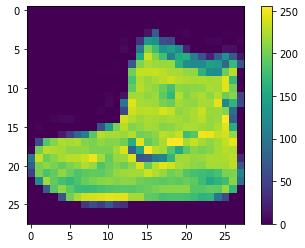

In [7]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [8]:
train_images = train_images / 255.0
test_images = test_images / 255.0

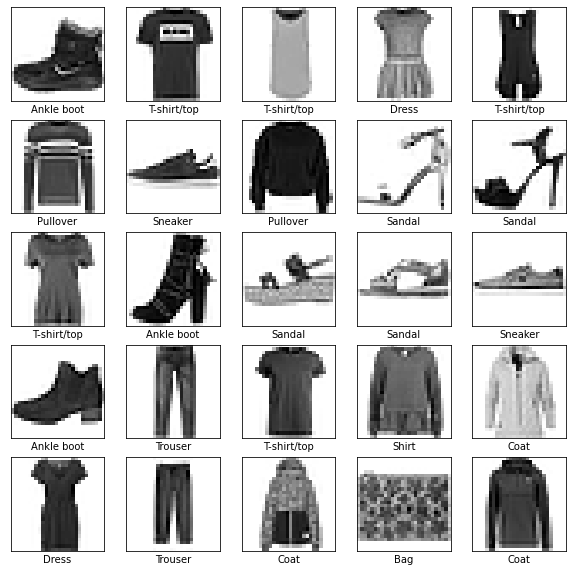

In [9]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1) # 한 화면에 여러 그래프를 나눠서 그려주는 기능 / 행,열,index
    plt.xticks([]) # tick : 축상의 위치 표시 지점 
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [10]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [11]:
model.compile(optimizer='adam', # optimizer : 모델의 업데이트 방법
              # sparse_categorical_crossentropy : 정수형 원 핫 인코딩
             loss='sparse_categorical_crossentropy', # loss : 모델과 실제 오차
             metrics=['accuracy']) # 훈련 단계와 테스트 단계를 모니터링 하기 위해 사용

In [12]:
model.fit(train_images, train_labels, epochs=10, verbose=0)
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 553us/step - loss: 0.2297 - accuracy: 0.9139
Epoch 2/5
1875/1875 [==============================] - 1s 553us/step - loss: 0.2225 - accuracy: 0.9167
Epoch 3/5
1875/1875 [==============================] - 1s 551us/step - loss: 0.2153 - accuracy: 0.9198
Epoch 4/5
1875/1875 [==============================] - 1s 549us/step - loss: 0.2085 - accuracy: 0.9215
Epoch 5/5
1875/1875 [==============================] - 1s 547us/step - loss: 0.2021 - accuracy: 0.9244


In [13]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\n테스트 정확도 : ', test_acc)

313/313 - 0s - loss: 0.3684 - accuracy: 0.8805

테스트 정확도 :  0.8805000185966492


In [14]:
predictions = model.predict(test_images)

In [15]:
predictions[0]

array([3.2670141e-07, 4.9061441e-08, 1.7123170e-08, 2.9746922e-13,
       3.4803511e-06, 1.7878398e-03, 3.8682850e-07, 1.4487420e-03,
       5.4969373e-08, 9.9675912e-01], dtype=float32)

In [16]:
np.argmax(predictions[0])

9

In [17]:
test_labels[0]

9

In [25]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

In [27]:
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

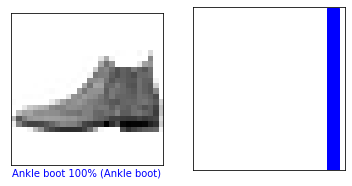

In [29]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

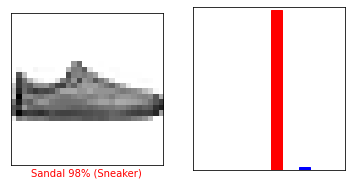

In [30]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

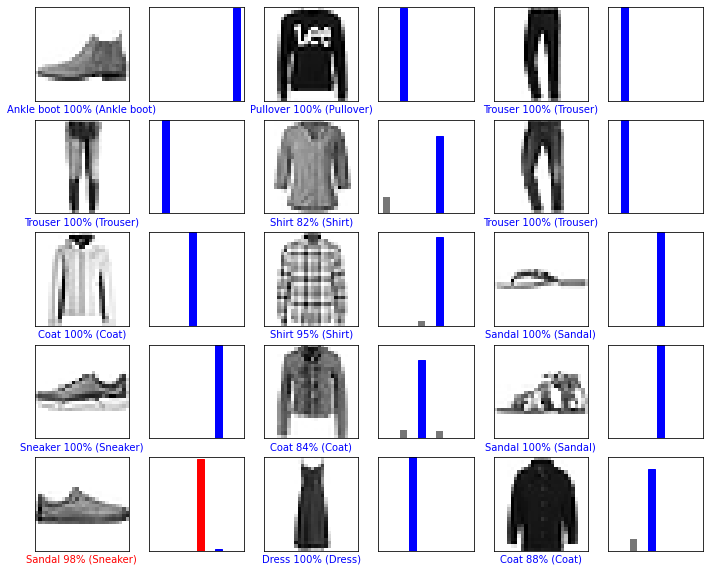

In [31]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows)) # 가로, 세로크기를 인치로 표시
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()
                

In [33]:
img = test_images[0]
print(img.shape)

(28, 28)


In [34]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [35]:
predictions_single = model.predict(img)
print(predictions_single)

[[3.2670263e-07 4.9061722e-08 1.7123202e-08 2.9746922e-13 3.4803677e-06
  1.7878423e-03 3.8683035e-07 1.4487448e-03 5.4969583e-08 9.9675912e-01]]


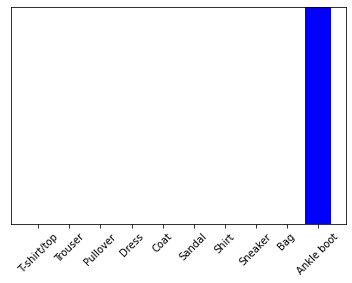

In [36]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [37]:
np.argmax(predictions_single[0])

9